In [2]:
from google.colab import files
uploaded = files.upload()

Saving flight_price.xlsx to flight_price.xlsx


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Q1: Load the flight price dataset and examine its dimensions.
flight_data = pd.read_excel('flight_price.xlsx')
print("Dimensions of the dataset:", flight_data.shape)  # This will give you the number of rows and columns



Dimensions of the dataset: (10683, 11)


In [7]:
flight_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
flight_data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


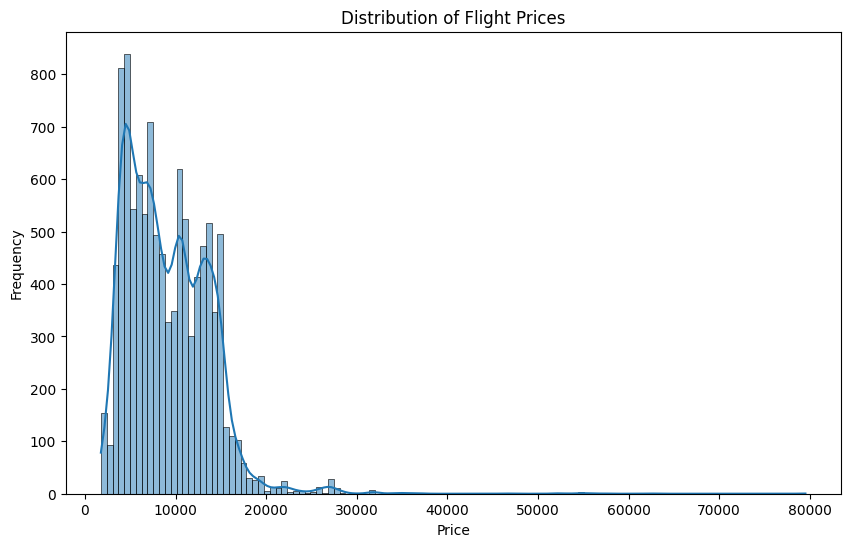

In [8]:
# Q2: Distribution of flight prices
plt.figure(figsize=(10, 6))
sns.histplot(flight_data['Price'], kde=True)
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [9]:
# Q3: Range of prices
min_price = flight_data['Price'].min()
max_price = flight_data['Price'].max()
price_range = max_price - min_price
print("Minimum price:", min_price)
print("Maximum price:", max_price)
print("Price range:", price_range)

Minimum price: 1759
Maximum price: 79512
Price range: 77753


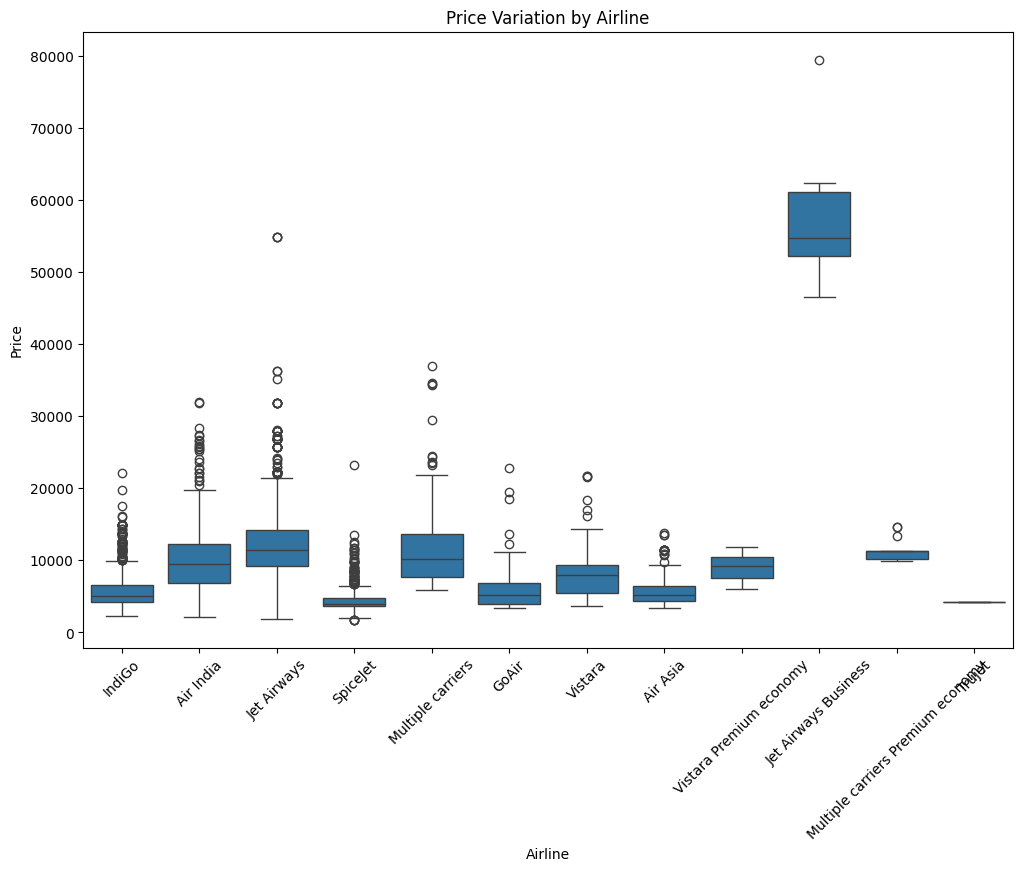

In [10]:
# Q4: Price variation by airline
plt.figure(figsize=(12, 8))
sns.boxplot(data=flight_data, x='Airline', y='Price')
plt.title('Price Variation by Airline')
plt.xticks(rotation=45)
plt.xlabel('Airline')
plt.ylabel('Price')
plt.show()


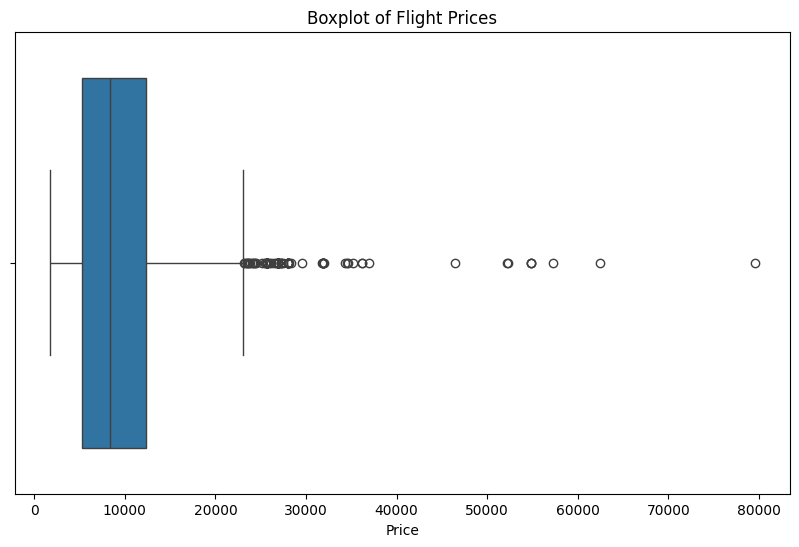

In [11]:
# Q5: Outliers detection
plt.figure(figsize=(10, 6))
sns.boxplot(data=flight_data, x='Price')
plt.title('Boxplot of Flight Prices')
plt.xlabel('Price')
plt.show()

In [14]:
# Q6: Identifying peak travel season
# We can use the 'Date_of_Journey' function to analyse flight fares over several months or seasons to find trends or patterns that indicate the peak travel season.
# Visualisations such as bar charts and line plots can be used to showcase your findings and illustrate the year-over-year fluctuations in prices.
flight_data.sort_values(by='Price',ascending=False)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2924,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,11:25,5h 40m,1 stop,Business class,79512
5372,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,12:25,6h 40m,1 stop,Business class,62427
10364,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,Business class,57209
1478,Jet Airways,18/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:40,00:45 16 Mar,6h 5m,1 stop,No info,54826
5439,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,16:55,23:00,6h 5m,1 stop,No info,54826
...,...,...,...,...,...,...,...,...,...,...,...
1513,Jet Airways,27/03/2019,Mumbai,Hyderabad,BOM → HYD,02:55,04:25,1h 30m,non-stop,In-flight meal not included,1840
10513,SpiceJet,27/03/2019,Mumbai,Hyderabad,BOM → HYD,05:45,07:05,1h 20m,non-stop,No info,1759
4839,SpiceJet,3/04/2019,Mumbai,Hyderabad,BOM → HYD,22:45,00:15 02 Apr,1h 30m,non-stop,No info,1759
4066,SpiceJet,21/03/2019,Mumbai,Hyderabad,BOM → HYD,22:45,00:10 22 Mar,1h 25m,non-stop,No info,1759


In [26]:
avg_price_by_airline = flight_data.groupby('Airline')['Price'].mean().sort_values(ascending=False)
avg_price_by_airline

Airline
Jet Airways Business                 58358.666667
Jet Airways                          11643.923357
Multiple carriers Premium economy    11418.846154
Multiple carriers                    10902.678094
Air India                             9611.210616
Vistara Premium economy               8962.333333
Vistara                               7796.348643
GoAir                                 5861.056701
IndiGo                                5673.682903
Air Asia                              5590.260188
SpiceJet                              4338.284841
Trujet                                4140.000000
Name: Price, dtype: float64

In [27]:
average_price_by_dest=flight_data.groupby('Destination')['Price'].mean().sort_values(ascending=False)
average_price_by_dest

Destination
New Delhi    11917.716738
Cochin       10539.439057
Banglore      9158.389411
Delhi         5143.918577
Hyderabad     5059.708752
Kolkata       4789.892388
Name: Price, dtype: float64

Text(0.5, 1.0, 'Avg Price of Flights')

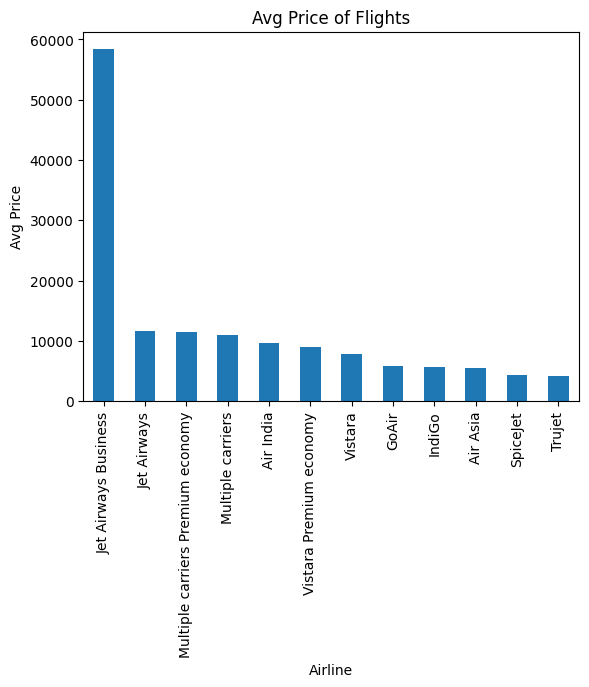

In [24]:
avg_price_by_airline.plot(kind='bar')
plt.xlabel('Airline')
plt.ylabel('Avg Price')
plt.title('Avg Price of Flights')


<ipython-input-31-daa4510963bf>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  flight_data['Month'] = pd.to_datetime(flight_data['Date_of_Journey']).dt.month


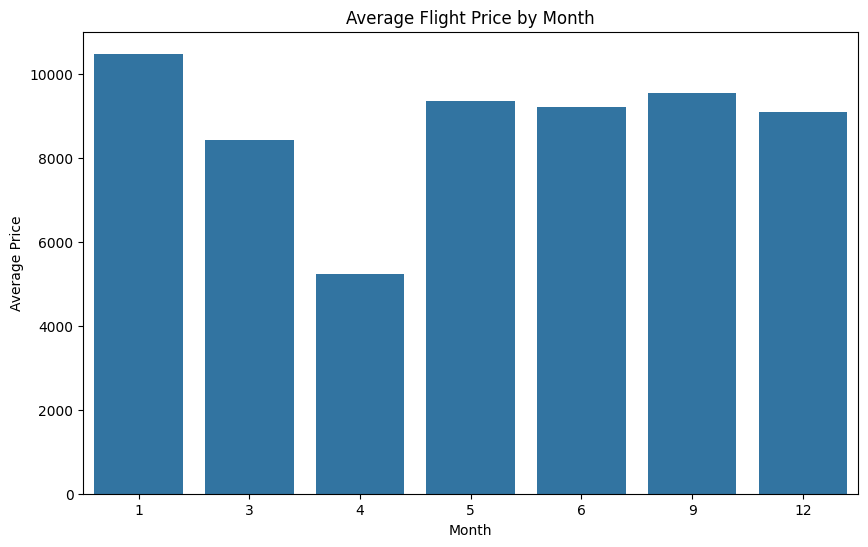

In [31]:
flight_data['Month'] = pd.to_datetime(flight_data['Date_of_Journey']).dt.month

avg_price_by_month = flight_data.groupby('Month')['Price'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_price_by_month, x='Month', y='Price')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Average Flight Price by Month')
plt.show()

#From this we can understand that April has the least ticket price in that year

In [44]:
# Q7: Analysis for flight booking website
# The dataset can be analysed to determine the variables that affect flight costs, including the origin, destination, airline, date, length, and number of stops.
# Furthermore, we can use the 'Date_of_Journey' to search for any seasonal trends in travel costs.
# The results of this study can be used to make recommendations to consumers, such as the ideal time to book flights or less expensive routes.
avg_price_by_route = flight_data.groupby(['Source', 'Destination'])['Price'].mean().unstack()
least_expensive_route = avg_price_by_route.min(axis=1).sort_values()
print("Least expensive route:", least_expensive_route)


Least expensive route: Source
Chennai      4789.892388
Mumbai       5059.708752
Banglore     5143.918577
Kolkata      9158.389411
Delhi       10539.439057
dtype: float64


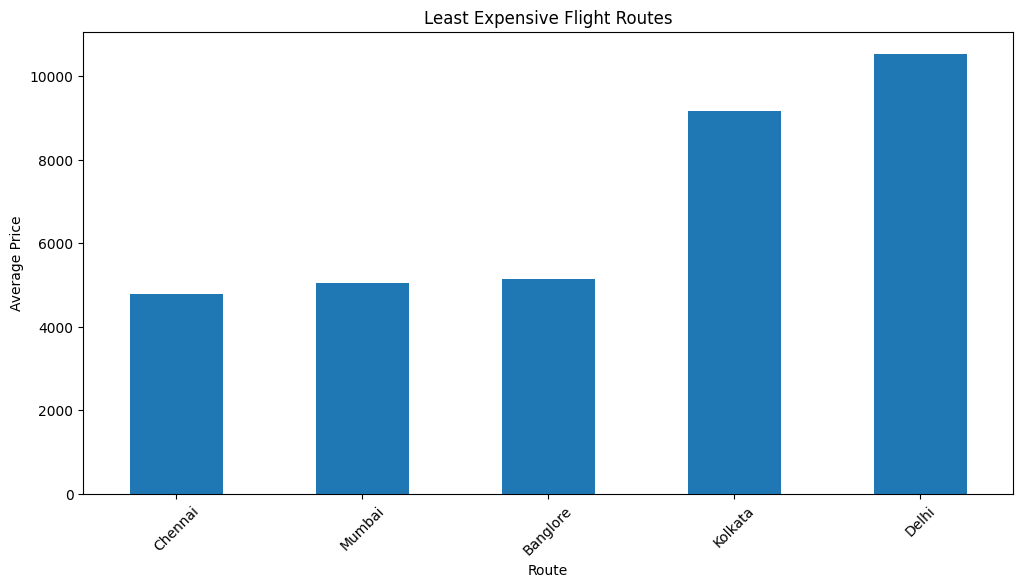

In [38]:
least_expensive_route = avg_price_by_route.min(axis=1).sort_values()

plt.figure(figsize=(12, 6))
least_expensive_route.plot(kind='bar')
plt.xlabel('Route')
plt.ylabel('Average Price')
plt.title('Least Expensive Flight Routes')
plt.xticks(rotation=45)
plt.show()
# So we can know that Chennai Mumbai and Bangalore are cheaper airports for travelling

#Q8. You are a data scientist working for an airline company, and you have been asked to analyze the Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to identify these factors, and how would you present your findings to the management team?



*   Airline: We can share insights about how rates differ across various airlines.This shows how contrasting is each airline's pricing tactics and market positioning, as well as average and range prices.


*   Source and Destination: We can see how prices vary according to the airports of origin and destination. Prices may increase on some routes due to increased demand or operating expenses.


*   Route: The effects of particular flight paths have on costs. Shorter or less-traveled routes could be less expensive than longer or more popular ones.
*   Date_of_Journey: The impact that travel dates have on airline costs are important. This include figuring out peak travel times, seasonal trends, and any price patterns related to holidays or other special occasions.


*   Timings of Departure and Arrival: It's possible that flights during busy periods will cost more.
*   The connection between flight length and cost. Tickets for longer flights may cost more since longer flights usually have higher operating expenses.